In [83]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [84]:
# Load the Titanic dataset from train.csv
titanic_data = pd.read_csv("train.csv")

In [85]:
# Display the first few rows of the dataset
print(titanic_data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


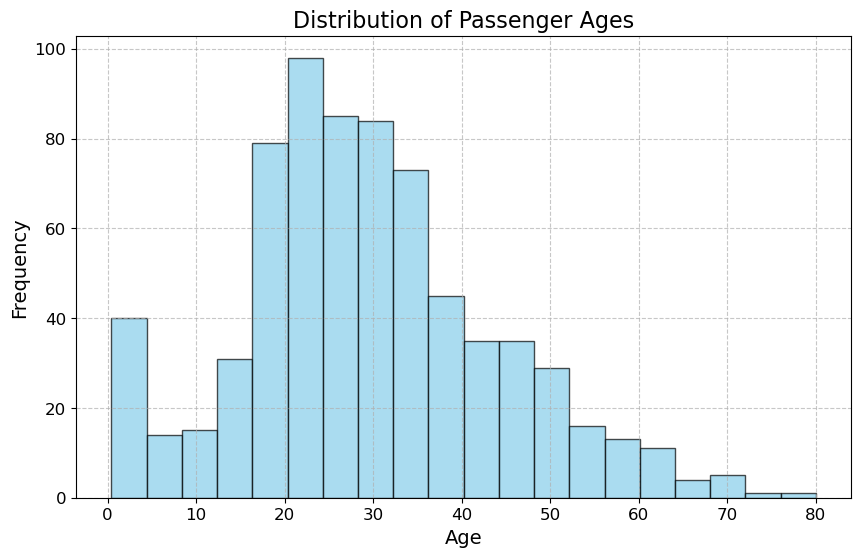

In [86]:
def plot_age_distribution(data):
    """
    Plot histogram for the distribution of passenger ages.
    """
    plt.figure(figsize=(10, 6))
    plt.hist(data['Age'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title('Distribution of Passenger Ages', fontsize=16)
    plt.xlabel('Age', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.savefig('histogram.png',bbox_inches='tight')
    plt.show()

# Call the method to plot the age distribution
plot_age_distribution(titanic_data)

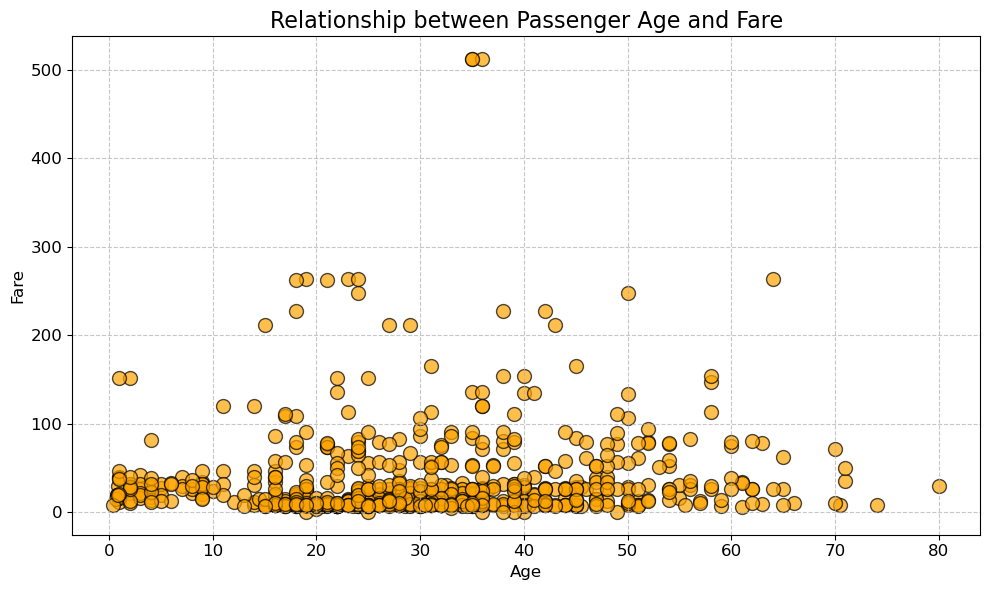

In [87]:
def plot_age_fare_relationship(data):
    """
    Plot scatter graph to visualize the relationship between passenger age and fare.
    """
    plt.figure(figsize=(10, 6))
    plt.scatter(data['Age'], data['Fare'], color='orange', alpha=0.7, marker='o', edgecolors='k', s=100)
    plt.title('Relationship between Passenger Age and Fare', fontsize=16)
    plt.xlabel('Age', fontsize=12)
    plt.ylabel('Fare', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.savefig('scatter.png',bbox_inches='tight')
    plt.show()

# Call the method to plot the age-fare relationship
plot_age_fare_relationship(titanic_data)


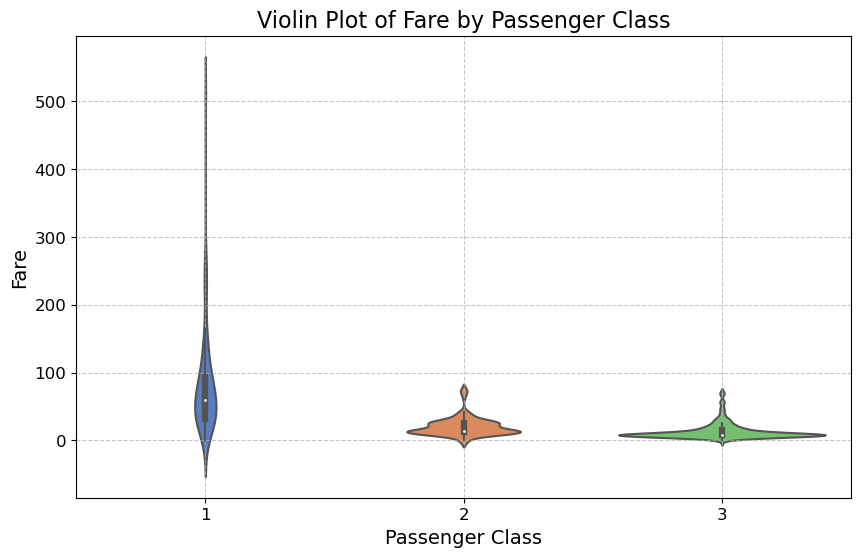

In [88]:
class TitanicDataVisualizer:
    def __init__(self, data):
        self.data = data

    def create_categorical_variable(self):
        self.data['Pclass_Category'] = self.data['Pclass'].astype('category')

    def create_violin_plot(self, save_path=None):
        plt.figure(figsize=(10, 6))
        sns.violinplot(x='Pclass_Category', y='Fare', data=self.data, palette='muted')
        plt.title('Violin Plot of Fare by Passenger Class', fontsize=16)
        plt.xlabel('Passenger Class', fontsize=14)
        plt.ylabel('Fare', fontsize=14)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.7)
        
        if save_path:
            plt.savefig(save_path, bbox_inches='tight')
        else:
            plt.show()

# Load the Titanic dataset
titanic_data = pd.read_csv("train.csv")

# Create TitanicDataVisualizer instance
visualizer = TitanicDataVisualizer(titanic_data)

# Create categorical variable based on 'Pclass'
visualizer.create_categorical_variable()

# Create and save violin plot
visualizer.create_violin_plot(save_path="violin_plot.png")


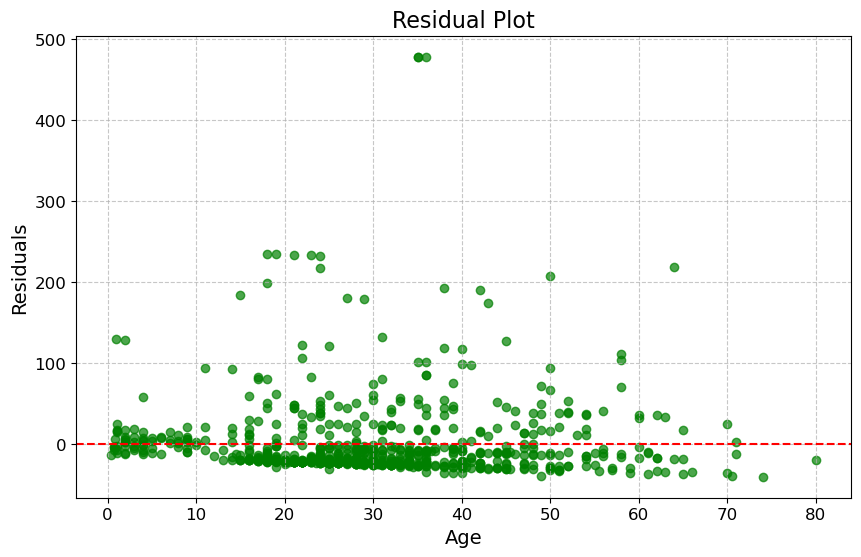

In [89]:
# Compute residuals
residuals = titanic_data['Fare'] - predicted_points

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(titanic_data['Age'], residuals, color='green', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('residual.png',bbox_inches='tight')
plt.show()


In [90]:
def preprocess_data(data):
    """
    Preprocess the data by handling missing values and normalizing features.

    Parameters:
    data (DataFrame): DataFrame containing the Titanic dataset.

    Returns:
    X_scaled (array): Preprocessed and scaled feature matrix.
    """
    # Select numerical features for clustering
    numerical_features = ['Age', 'Fare']
    X = data[numerical_features]

    # Handle missing values
    imputer = SimpleImputer(strategy='median')
    X_imputed = imputer.fit_transform(X)

    # Normalize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_imputed)

    return X_scaled

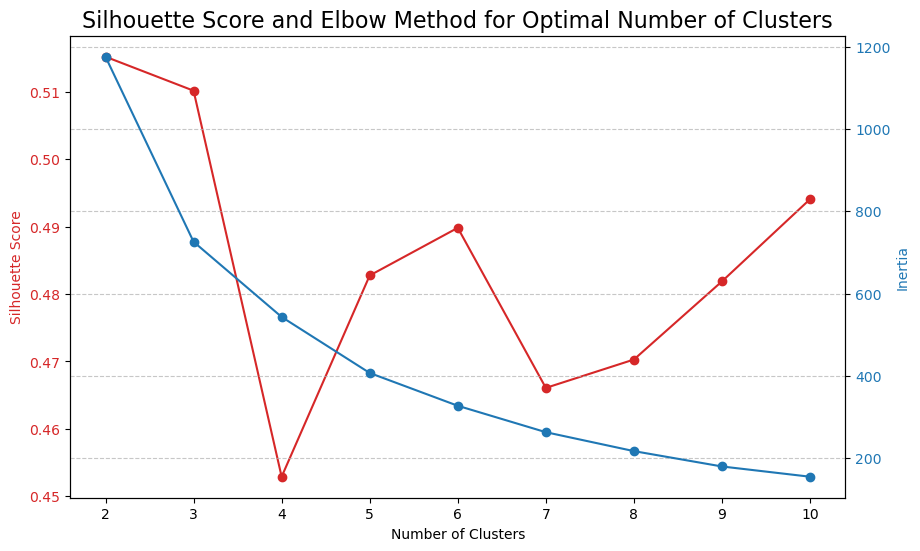

In [91]:
def find_optimal_clusters(X):
    """
    Find the optimal number of clusters using silhouette score and elbow method.
    """
    # Calculate silhouette scores for different numbers of clusters
    silhouette_scores = []
    clusters_range = range(2, 11)
    for n_clusters in clusters_range:
        kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)

        kmeans.fit(X)
        silhouette_scores.append(silhouette_score(X, kmeans.labels_))

    # Use the elbow method to find the optimal number of clusters
    distortions = []
    for n_clusters in clusters_range:
        kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
        kmeans.fit(X)
        distortions.append(kmeans.inertia_)

    # Plot silhouette scores and elbow plot together
    fig, ax1 = plt.subplots(figsize=(10, 6))

    color = 'tab:red'
    ax1.set_xlabel('Number of Clusters')
    ax1.set_ylabel('Silhouette Score', color=color)
    ax1.plot(clusters_range, silhouette_scores, marker='o', color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('Inertia', color=color)
    ax2.plot(clusters_range, distortions, marker='o', color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    plt.title('Silhouette Score and Elbow Method for Optimal Number of Clusters', fontsize=16)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.savefig('Elbow.png',bbox_inches='tight')
    plt.show()

    # Choose the optimal number of clusters based on the silhouette score
    n_clusters = clusters_range[np.argmax(silhouette_scores)]
    return n_clusters

# Preprocess the data
X_scaled = preprocess_data(titanic_data)

# Find the optimal number of clusters
n_clusters = find_optimal_clusters(X_scaled)

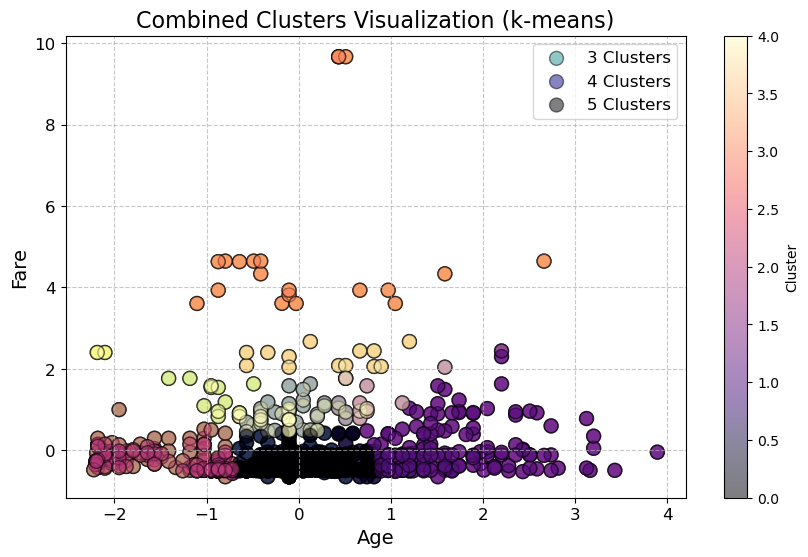

In [92]:
def plot_combined_clusters(X, labels_1, labels_2, labels_3):
    """
    Plot the combined clusters from different options on a single scatter plot.

    Parameters:
    X (array): Preprocessed feature matrix.
    labels_1 (array): Cluster labels for option 1.
    labels_2 (array): Cluster labels for option 2.
    labels_3 (array): Cluster labels for option 3.
    """
    plt.figure(figsize=(10, 6))

    # Plot clusters for option 1
    plt.scatter(X[:, 0], X[:, 1], c=labels_1, cmap='viridis', edgecolor='k', alpha=0.5, s=100, label='3 Clusters')

    # Plot clusters for option 2
    plt.scatter(X[:, 0], X[:, 1], c=labels_2, cmap='plasma', edgecolor='k', alpha=0.5, s=100, label='4 Clusters')

    # Plot clusters for option 3
    plt.scatter(X[:, 0], X[:, 1], c=labels_3, cmap='magma', edgecolor='k', alpha=0.5, s=100, label='5 Clusters')

    plt.title('Combined Clusters Visualization (k-means)', fontsize=16)
    plt.xlabel('Age', fontsize=14)
    plt.ylabel('Fare', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.colorbar(label='Cluster')
    plt.legend(fontsize=12)
    plt.savefig('K_means.png',bbox_inches='tight')
    plt.show()

# Plot the combined clusters on a single scatter plot
plot_combined_clusters(X, kmeans_labels_3, kmeans_labels_4, kmeans_labels_5)


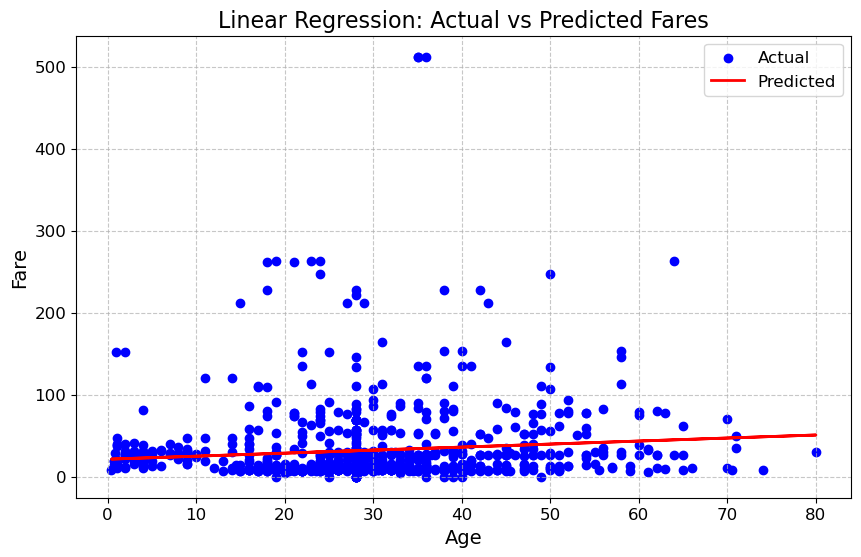

In [93]:
def linear_regression_actual_vs_predicted(data):
    """
    Create a linear regression model to predict passenger fares based on ages
    """
    # Select features (X: Age) and target (y: Fare)
    X = data[['Age']]
    y = data['Fare']

    # Handle missing values in Age column
    imputer = SimpleImputer(strategy='median')
    X_imputed = imputer.fit_transform(X)

    # Create and fit the linear regression model
    model = LinearRegression()
    model.fit(X_imputed, y)

    # Predict fares using the model
    y_pred = model.predict(X_imputed)

    # Plot actual vs predicted fares
    plt.figure(figsize=(10, 6))
    plt.scatter(X_imputed, y, color='blue', label='Actual')
    plt.plot(X_imputed, y_pred, color='red', linewidth=2, label='Predicted')
    plt.title('Linear Regression: Actual vs Predicted Fares', fontsize=16)
    plt.xlabel('Age', fontsize=14)
    plt.ylabel('Fare', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.savefig('Linear Regression.png',bbox_inches='tight')
    plt.show()

# Call the method to create linear regression model and visualize actual vs predicted fares
linear_regression_actual_vs_predicted(titanic_data)


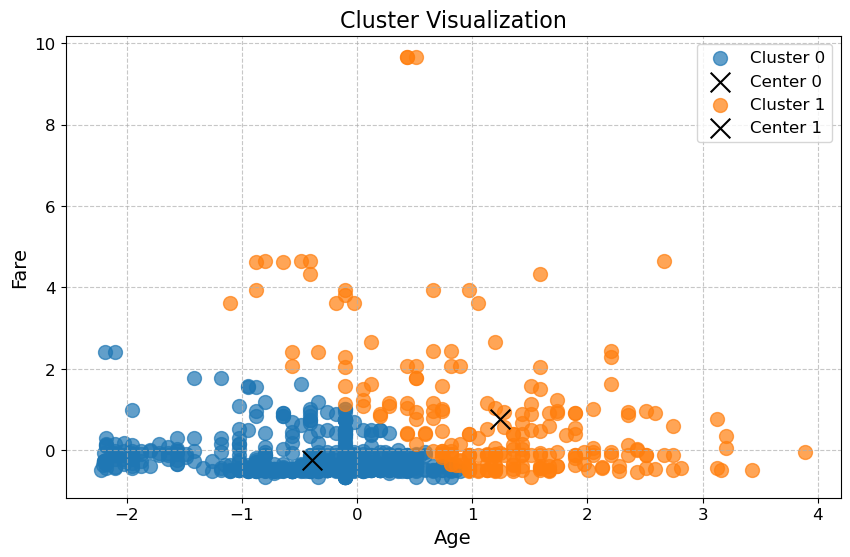

In [94]:
def plot_clusters(X, labels, cluster_centers):
    """
    Plot the clusters on a scatter plot.

    Parameters:
    X (array): Preprocessed and scaled feature matrix.
    labels (array): Cluster labels assigned by k-means clustering.
    cluster_centers (array): Cluster centers.
    """
    plt.figure(figsize=(10, 6))
    for i in range(len(cluster_centers)):
        plt.scatter(X[labels == i, 0], X[labels == i, 1], label=f'Cluster {i}', alpha=0.7, s=100)
        plt.scatter(cluster_centers[i, 0], cluster_centers[i, 1], marker='x', color='black', label=f'Center {i}', s=200)
    plt.title('Cluster Visualization', fontsize=16)
    plt.xlabel('Age', fontsize=14)
    plt.ylabel('Fare', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.savefig('cluster violization.png',bbox_inches='tight')
    plt.show()

def perform_kmeans(X, n_clusters):
    """
    Perform k-means clustering with the specified number of clusters.

    Parameters:
    X (array): Preprocessed and scaled feature matrix.
    n_clusters (int): Number of clusters.

    Returns:
    labels (array): Cluster labels assigned by k-means clustering.
    cluster_centers (array): Cluster centers.
    """
    # Fit k-means clustering with the specified number of clusters
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
    kmeans.fit(X)
    # Get cluster labels and centers
    labels = kmeans.labels_
    cluster_centers = kmeans.cluster_centers_
    return labels, cluster_centers

# Perform k-means clustering with the optimal number of clusters
labels, cluster_centers = perform_kmeans(X_scaled, n_clusters)

# Plot the clusters
plot_clusters(X_scaled, labels, cluster_centers)